In [1]:
from graphviz import Digraph

### 5.1 (柴田)
#### 問
[JFLAP](http://www.jflap.org/)を使ってすべての"C"を"G"に, すべての"G"を"C"に書き換えるチューリングマシン"SwapCandG"を実装せよ. 複数の入力を使ってマシンをテストせよ. 
#### 答え
- JFLAPはスキップしてdesc(SwapCandG)を示す  
q0->q0: !CG;R  
q0->q0: C;G,R  
q0->q0: G;C,R  
q0->qH: _;S  



### 5.3（冨田）
#### 問
 - 与えられた文字列が'G'が5個以上かつ'T'が高々3個なら受理, それ以外なら拒絶する受理器チューリングマシン.  
 - 前提：インプットは, xで始まりxで終わる遺伝子配列文字列とする.（例:'xCTCGTAx'）  
 （簡単のため. そうでない場合は最初を'_'に置き換え, もし最初の文字が'G'or'T'なら末尾にそれを足す, みたいな操作をすればよさそう.）  

#### 答え
 - アルファベット：{x, C, G, A, T, _}
 - 状態集合：{q_accept, q_reject, q_0, q_1, ..., q_10}
 - 遷移関数は以下の通り：
   - q_0：スタートはxのはずなので1個右に進みq_1へ.
   - q_1-q_5：Gを5個カウントしていく.
     - 1つずつ右に進んでいき, Gがあれば次のステートへ. 途中で終わったら（xに当たったら）拒絶.
   - q_6：スタートに戻る. 戻ったら1個右に進んでq_7へ.
   - q_7-q_9：Tを3個目までカウントしていく.
     - 1つずつ右に進んでいき, Tがあれば次のステートへ. 途中で終わったら（xに当たったら）受理.
   - q_10：1つずつ右に進んでいき, 途中で終わったら受理. TがあればT4つめになるので拒絶.

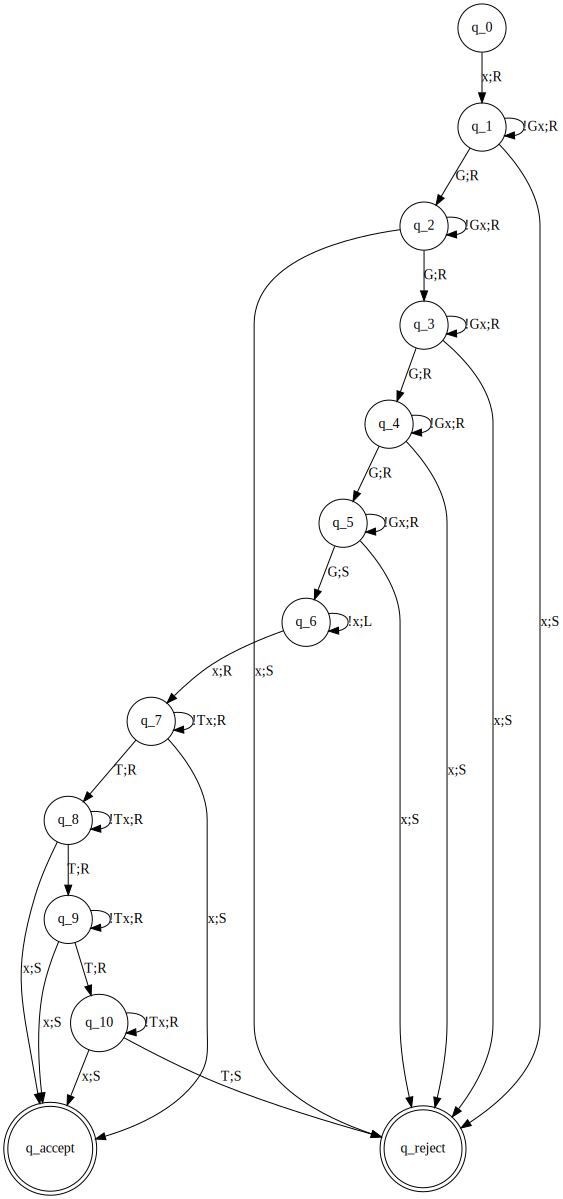

In [2]:
g = Digraph()
g.attr('node', shape='doublecircle')
g.node('q_accept')
g.node('q_reject')

g.attr('node', shape='circle')
g.edge('q_0', 'q_1', label='x;R')

for i in range(1,5):
    g.edge(f'q_{i}', f'q_{i+1}', label='G;R')
    g.edge(f'q_{i}', 'q_reject', label='x;S')
    g.edge(f'q_{i}', f'q_{i}', label='!Gx;R')
    
g.edge('q_5', 'q_6', label='G;S')
g.edge('q_5', 'q_reject', label='x;S')
g.edge('q_5','q_5', label='!Gx;R')
    
g.edge('q_6', 'q_6', label='!x;L')
g.edge('q_6', 'q_7', label='x;R')

for i in range(7,10):
    g.edge(f'q_{i}', f'q_{i+1}', label='T;R')
    g.edge(f'q_{i}', f'q_{i}', label='!Tx;R')
    g.edge(f'q_{i}', 'q_accept', label='x;S')

g.edge('q_10', 'q_10', label='!Tx;R')
g.edge('q_10', 'q_accept', label='x;S')
g.edge('q_10', 'q_reject', label='T;S')

g

### 5.6 (柴田)
#### 問
入力を反転するチューリングマシンを作れ. 入力は"x"記号で境界を区切られた遺伝子文字列だと考えてよい. また, この章で定義した部品を自由に使ってよい.
#### 答え
- 文字列の最後に"A"をつけるappendA, やそれと同様にappendC, appendG, appendTを用意する
- 左端のxからスタートし, 入力を削除し, 反転させた入力のみを残してその左端で止まるdeleteToOutputを用意する
- 以下の手順のアルゴリズムを実行する
    - q0: テープの左端からスタートし,q1として右端の"x"まできたら左に進み, q2へ遷移する
    - q2: "A, C, G, T"のどれかであれば"y"に置き換えて対応したappendXへ遷移し、その場にとどまる. "x"であればdeleteToOutputへ遷移し、その場にとどまる. それ以外であれば左に進む
    - appendXからはq3へ遷移する
    - q3: "y"が現れるまで左に進み, "y"が現れたらq1に遷移して左に進む
    - deleteToOutputの後は右へ進み最後の空白まで来たら"x"に置き換えて停止する
- ASCIIで記述する  
    - appendA
        - q0->q0: !_;R
        - q0->qH: _;A,S
    - deleteToOutput
        - q0->q1: x;R
        - q1->q1: !x;R
        - q1->q2: x;L
        - q2->q2: !x;_,L
        - q2->qH: x;S 
    - Answer5_6
        - q0->q1: x;R
        - q1->q1: !x;R
        - q1->q2: x;L
        - q2->q2: !ACGT;L
        - q2->appendA: A;y,S
        - appendA->q3: A;S
        - q2->appendC: C;y,S
        - appendA->q3: C;S
        - q2->appendG: G;y,S
        - appendA->q3: G;S
        - q2->appendT: T;y,S
        - appendA->q3: T;S
        - q3->q3: !y;L
        - q3->q2: y;L
        - q2->deleteToOutput: x;S
        - deleteToOutput->appendx: x;S
        - appendx->qH: x;S

### 5.8（冨田）
#### 問
 - Cの数がGの数よりも多くない遺伝子文字列を受理するチューリングマシンnoMoreCsThanGsを, MoreCsThanGs（p88図5.7）から作れ.
 
#### 答え
 - 図5.7におけるステート'q_accept'と'q_reject'を取り替えれば良い.

### 5.11 (柴田)
#### 問
一般に, $k$本のテープ, $k$個の独立したヘッドを持ち, アルファベットが$s$個の記号を持つマシン$M$に対して同じシミュレーションを行うとき, 対応するシングルヘッドマシン$M'$は, 何本のテープと何個の記号を必要とするか. 
#### 答え
- $s\ge 2$を仮定する
- $M$の$1$本のテープの情報と対応するヘッドの位置情報を$2$本のテープで表現すれば, $2k$本のテープを持つシングルヘッドマシン$M'$では, $s$個の記号を必要とする (ヘッドの位置情報については$s$の内の$2$文字を適切に対応させればよい)
- $M$の$1$本のテープの情報と対応するヘッドの位置情報を$1$本のテープにおいて末尾の文字を追加することで表現すれば, $k$本のテープのシングルヘッドマシン$M'$は$2s$個の記号を必要とする ($k\le l < 2k$のすべての$l$本のテープの場合に対して同様)

### 5.13（冨田）
#### (a) Q.
 - SHIFT命令を実装するチューリングマシン.
 - 入力はxで囲まれた2進文字列(例：'x11001x'）で, 出力は1bit右にシフトした2進文字列で右端は削除, 左端は0（例：'x01100x'）.

#### A.
 - アルファベット：{x, 0, 1, _}
 - ステート：{q_halt, q_0, q_1, ..., q_6}
 - 遷移関数：
     - q_0：xのはずなので1個右に進みq_1へ.
     - q_1：末尾（x）まで右へ. xがあったら1個左へ戻りq_2へ.
     - q_2：一個左へ戻りq_3へ.
     - q_3：
         - 1だったら右に進み, q_4で1に書き換え, 左に進んでq_2へ.
         - 0だったら右に進み, q_5で0に書き換え, 左に進んでq_2へ.
         - xだったら右に進み, q_6で0に書き換えて終了（q_haltへ）.

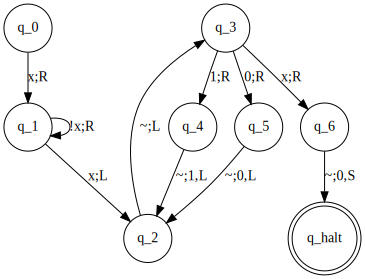

In [3]:
g = Digraph()
g.attr('node', shape='doublecircle')
g.node('q_halt')

g.attr('node', shape='circle')
g.edge('q_0', 'q_1', label='x;R')
g.edge('q_1', 'q_1', label='!x;R')
g.edge('q_1', 'q_2', label='x;L')
g.edge('q_2', 'q_3', label='~;L')
g.edge('q_3', 'q_4', label='1;R')
g.edge('q_4', 'q_2', label='~;1,L')
g.edge('q_3', 'q_5', label='0;R')
g.edge('q_5', 'q_2', label='~;0,L')
g.edge('q_3', 'q_6', label='x;R')
g.edge('q_6', 'q_halt', label='~;0,S')

g

#### (b) Q.
 - AND命令を実装するチューリングマシン.
 - 入力はxで囲まれた区切られた2つの2進文字列.
 - 出力は両方ともゼロでなければ'x1x', そうでなければ'x0x'.
 - 例：'x101x0100x'は'x1x', 'x00x010x'なら'x1x'.

#### A. 
 - 全体と 'x1xTM'('x_x_x'の形の文字列を'x1x'にする)と'x0xTM'（'x0x'にする）からなる.
#### 全体のチューリングマシン
 - q_0：1個進む.
 - q_1：0なら右に進む. xにたどり着いたら'x0xTM'へ. 1にたどり着いたらq_2へ.
 - q_2：xまで進み続ける. xがあったら1個右に進んでq_3へ.
 - q_3：0なら右に進む. xにたどりついたら'x0xTM'へ. 1にたどり着いたら'x1xTM'へ.
 - 'x0xTM'は'x0x'を書いて終了. 'x1xTM'は'x1x'を書いて終了.

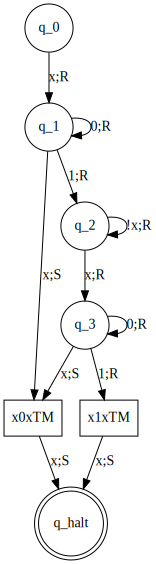

In [4]:
g = Digraph()
g.attr('node', shape='doublecircle')
g.node('q_halt')

g.attr('node', shape='box')
g.node('x1xTM')
g.node('x0xTM')

g.attr('node', shape='circle')
g.edge('q_0', 'q_1', label='x;R')
g.edge('q_1', 'q_2', label='1;R')
g.edge('q_1', 'q_1', label='0;R')
g.edge('q_1', 'x0xTM', label='x;S')
g.edge('q_2', 'q_2', label='!x;R')
g.edge('q_2', 'q_3', label='x;R')
g.edge('q_3', 'q_3', label='0;R')
g.edge('q_3', 'x1xTM',label='1;R')
g.edge('q_3', 'x0xTM', label='x;S')

g.edge('x0xTM', 'q_halt', label='x;S')
g.edge('x1xTM', 'q_halt', label='x;S')

g.attr('node')


g

#### x1xTM
 - q_0で末尾まで進む.
 - q_1でxを消す.
 - q_2で数字を消していく. xにたどり着いたらそれを消して左に進みq_3へ.
 - q_3で数字を消していく. xにたどりいついたらそれは消さずに右に進みq_4へ.
 - q_4で1を書く.
 - q_5で'x'を書いて終了.
#### x0xTM
 - x1xTM はq_4で, 0を書くようにしたもの（遷移図省略）

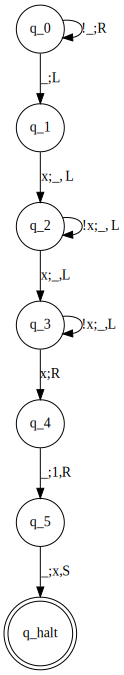

In [5]:
# 'x1xTM': 'x*x*x'の形の文字列を'x1x'にする.

g = Digraph()
g.attr('node', shape='doublecircle')
g.node('q_halt')

g.attr('node', shape='circle')
g.edge('q_0', 'q_0', label='!_;R')
g.edge('q_0', 'q_1', label='_;L')
g.edge('q_1', 'q_2', label='x;_, L')
g.edge('q_2', 'q_2', label='!x;_, L')
g.edge('q_2', 'q_3', label='x;_,L')
g.edge('q_3', 'q_3', label='!x;_,L')
g.edge('q_3', 'q_4', label='x;R')
g.edge('q_4', 'q_5', label='_;1,R')
g.edge('q_5', 'q_halt', label='_;x,S')
g

### 5.16 (柴田)
#### 問
演習問題5.2のbinaryDecrementerチューリングマシンについて考える. 図5.17で提案した記法を使って, このマシンのASCII記述, desc(binaryDecrementer)を示せ
#### 答え
q0->q1: x;R  
q1->q1: 01;R  
q1->q2: x;L    
q2->q2: 0;1,L  
q2->qH: 1;0,S

### 5.18（冨田）
#### (a) $10^{t-1} -1$
 - 1ステップ目からt-1ステップ目まで, アドレステープの今のセルに'9'を書きヘッドを右にずらすというのを繰り返すと, $n = 10^{t-1}-1 = 99...9$ ($t-1$桁)となる.
 - tステップ目でRAM$[n]$になんらかの記号を書き込む.
 
#### (b) $⌊t/2⌋$個
 - 1ステップでRAMテープの異なるセルに記号を書き込むには, その前に1ステップ使ってアドレステープを書き換えることが必要.
 - 例えば, 奇数ステップ目で今のアドレステープのセルに1を書いてヘッドを右にずらし, 偶数ステップ目でRAMに記号'a'書き込むというふうに.
 - したがって, 書き込めるセル数は最大で, $t$ が偶数なら $t/2$, 奇数なら $(t-1)/2$.

#### (c) $O(t^2)$
 - (抜粋10.4で使うのはこの $O(t^2)$ のオーダーであるという事実なのでこれを答えとした.)
 - (a)から最大で書き込めるセルの10進数での桁数は $t-1$ 桁なので, 1つのRAMセルの内容の記録に必要な文字数は区切り':',';'と記号分を合わせて $t+2$.
 - (b)より書き込めるセル数は $t/2$ 以下なので, Tの空白記号でないセル数の上限は $(t+2)\cdot t/2 = \frac{t^2}{2}+t$ 未満.
 - (b)の例のように書き込めば, '1:a;11:a; ... ;11...1:a'となり, 数字部分だけで $1+2+\dots+(t/2) = \frac{t^2}{8}+\frac{t}{4}$となるので, 上限は少なくともこれ以上.
 - したがって, Tの空白記号でないセル数の上限は $O(t^2)$.